In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install adjustText
!pip install catboost
!pip install shap
!pip install eli5
import pandas as pd
import re
import warnings
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import shap
import eli5
from eli5.sklearn import PermutationImportance  
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text
from textwrap import wrap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from catboost import Pool, cv, CatBoostClassifier
from sklearn.metrics import  classification_report, log_loss, roc_auc_score
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
games = pd.read_csv("/content/drive/MyDrive/L'algo de Paulo - mission 1 - datasets/DATASET NBA/data complémentaires/KAGGLE Dataset with all NBA games from 2004 season to dec 2020/games.csv")
details = pd.read_csv("/content/drive/MyDrive/L'algo de Paulo - mission 1 - datasets/DATASET NBA/data complémentaires/KAGGLE Dataset with all NBA games from 2004 season to dec 2020/games_details.csv")
teams = pd.read_csv("/content/drive/MyDrive/L'algo de Paulo - mission 1 - datasets/DATASET NBA/data complémentaires/KAGGLE Dataset with all NBA games from 2004 season to dec 2020/teams.csv")
players = pd.read_csv("/content/drive/MyDrive/L'algo de Paulo - mission 1 - datasets/DATASET NBA/data complémentaires/KAGGLE Dataset with all NBA games from 2004 season to dec 2020/players.csv")
ranking = pd.read_csv("/content/drive/MyDrive/L'algo de Paulo - mission 1 - datasets/DATASET NBA/data complémentaires/KAGGLE Dataset with all NBA games from 2004 season to dec 2020/ranking.csv")
NEW=pd.read_csv("/content/drive/MyDrive/L'algo de Paulo - mission 1 - datasets/DATASET NBA/data complémentaires/KAGGLE Dataset with all NBA games from 2004 season to dec 2020/ODD2019 (1).txt")

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=e2c8442e58aadfbfeea6229cdad5bda8651abb9f5a5f63d71a741edcb14f2eaa
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText
     |████████████████████████████████| 76.3 MB 58 kB/s 
     |████████████████████████████████| 564 kB 5.0 MB/s 
     |████████████████████████████████| 106 kB 5.2 MB/s 


##Import drive Yoan ##
!pip install adjustText
!pip install catboost
!pip install shap
!pip install eli5
import pandas as pd
import re
import warnings
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import shap
import eli5
from eli5.sklearn import PermutationImportance  
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text
from textwrap import wrap
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from catboost import Pool, cv, CatBoostClassifier
from sklearn.metrics import  classification_report, log_loss, roc_auc_score
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
games = pd.read_csv("/content/drive/MyDrive/AlgoPaulo/DATASETSNBA/games.csv")
details = pd.read_csv("/content/drive/MyDrive/AlgoPaulo/DATASETSNBA/games_details.csv")
teams = pd.read_csv("/content/drive/MyDrive/AlgoPaulo/DATASETSNBA/teams.csv")
players = pd.read_csv("/content/drive/MyDrive/AlgoPaulo/DATASETSNBA/players.csv")
ranking = pd.read_csv("/content/drive/MyDrive/AlgoPaulo/DATASETSNBA/ranking.csv")
NEW=pd.read_csv("/content/drive/MyDrive/AlgoPaulo/ODDNBA/ODD20-21.txt",sep="\t")

In [3]:
games.head(1)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120.0,0.557,0.684,0.429,26.0,45.0,1610612764,95.0,0.402,0.633,0.091,22.0,40.0,1


In [4]:
import pandas_profiling

In [5]:
#pfr = pandas_profiling.ProfileReport(games)

In [6]:
games['PTS_home'].dtype

dtype('float64')

In [7]:
# games['PTS_home']=games[['PTS_home']].dropna().astype(int)  ### inneficace

In [8]:
games = games.dropna(axis=0).astype({'PTS_home': np.int})
games = games.dropna(axis=0).astype({'PTS_away': np.int})

In [9]:
# creation nouvelle colonne 'result'
games['result']=games['PTS_home'].astype(str)+":"+games['PTS_away'].astype(str)

In [10]:
games.head(1)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,result
0,2021-05-26,42000102,Final,1610612755,1610612764,2020,1610612755,120,0.557,0.684,0.429,26.0,45.0,1610612764,95,0.402,0.633,0.091,22.0,40.0,1,120:95


In [11]:
# avant reformatage
games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.457800e+04,2.457800e+04,2.457800e+04,24578.000000,2.457800e+04,24578.000000,24578.000000,24578.000000,24578.000000,24578.000000,24578.000000,2.457800e+04,24578.000000,24578.000000,24578.00000,24578.000000,24578.000000,24578.000000,24578.000000
mean,2.169025e+07,1.610613e+09,1.610613e+09,2011.416592,1.610613e+09,102.766621,0.460256,0.759083,0.356084,22.649972,43.272764,1.610613e+09,99.907641,0.449023,0.75738,0.349443,21.296607,41.972821,0.591423
std,5.456096e+06,8.643714e+00,8.658480e+00,5.128362,8.643714e+00,13.112642,0.056706,0.100530,0.113140,5.169164,6.609140,8.658480e+00,13.247136,0.055554,0.10330,0.111319,5.126141,6.508188,0.491581
min,1.030000e+07,1.610613e+09,1.610613e+09,2003.000000,1.610613e+09,36.000000,0.250000,0.143000,0.000000,6.000000,15.000000,1.610613e+09,33.000000,0.244000,0.14300,0.000000,4.000000,19.000000,0.000000
25%,2.060095e+07,1.610613e+09,1.610613e+09,2007.000000,1.610613e+09,94.000000,0.421000,0.696000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.411000,0.69200,0.278000,18.000000,38.000000,0.000000
50%,2.110095e+07,1.610613e+09,1.610613e+09,2012.000000,1.610613e+09,102.000000,0.459000,0.765000,0.357000,22.000000,43.000000,1.610613e+09,99.000000,0.448000,0.76200,0.350000,21.000000,42.000000,1.000000
75%,2.160118e+07,1.610613e+09,1.610613e+09,2016.000000,1.610613e+09,111.000000,0.500000,0.828000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.82800,0.421000,25.000000,46.000000,1.000000
max,5.200021e+07,1.610613e+09,1.610613e+09,2020.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.674000,1.00000,1.000000,46.000000,81.000000,1.000000


In [12]:
# Reformatage Player NAME
details['PLAYER_NAME_SHORT'] = details['PLAYER_NAME'].str.replace('^(.).*\s(.*)', '\\1.\\2')   #     .* <=> followed by 0 or more (any) characters       ^<=> starts with 
# Reformatage Colonne  MIN
details[["MINS", "SECS"]] = details.MIN.str.extract(r"([^:]+):(.*)")
details.loc[(~details.MIN.str.contains(':', na = True)), 'SECS'] = details.MIN
details.MINS = pd.to_numeric(details.MINS)
details.SECS = pd.to_numeric(details.SECS)
details['PLAY_TIME'] = np.round(details.MINS.fillna(0) + details.SECS/60)

In [13]:
# DONNEES DE BASE DE LA TABLE 'INITIALE' GAME
games = games.loc[~games[['GAME_ID', 'GAME_DATE_EST']].duplicated()] #Leaving one entry per game
games['GAME_DATE_EST'] = pd.to_datetime(games.GAME_DATE_EST)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
# TABLE RANKING
ranking['STANDINGSDATE'] = pd.to_datetime(ranking['STANDINGSDATE'])
ranking.sort_values('STANDINGSDATE', inplace = True)
ranking = ranking.loc[ranking.SEASON_ID // 10000 == 2]
ranking['SEASON_ID'] = ranking['SEASON_ID'] % 10000
ranking['MAX_S_GAMES'] = ranking.groupby('SEASON_ID').G.transform(max)
ranking.head(1)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY,MAX_S_GAMES
164300,1610612752,0,2002,2003-10-01,East,New York,82,37,45,0.451,24-17,13-28,NaN,82


In [15]:
## A PARTIR DE LA TABLE RANKING
# Création d'un df avec début et fin de saison pour exclure les matchs de pré-saison et éliminatoires
start_dates = ranking.loc[ranking.SEASON_ID > 2002].groupby('SEASON_ID')['STANDINGSDATE'].min().to_frame('FIRST_GAME').reset_index()     #ranking.SEASON_ID > 2002     ######
t = ranking.loc[(ranking['G'] == ranking['MAX_S_GAMES'])].groupby(['SEASON_ID', 'STANDINGSDATE'])['TEAM_ID'].nunique().to_frame('TEAMS').reset_index()


In [16]:
playoff_dates = t.loc[(t.TEAMS == 30) | ((t.TEAMS == 28) & (t.SEASON_ID == 2012)) | ((t.TEAMS == 29) & (t.SEASON_ID == 2003))].groupby('SEASON_ID')['STANDINGSDATE'].min().to_frame('LAST_GAME').reset_index()
#playoff_dates = t.loc[(t.TEAMS == 30)].groupby('SEASON_ID')['STANDINGSDATE'].min().to_frame('LAST_GAME').reset_index()                                                  ######
dates = start_dates.merge(playoff_dates, how = 'left')
dates.loc[dates.SEASON_ID == 2019, 'LAST_GAME'] = pd.to_datetime('2020-03-12') #Manually adding the end of regular season  #!!!!!


In [17]:
# TABLE DETAILS - selection des données de la saison régulière
# FUSION 1 
details = details.merge(games[['GAME_ID', 'GAME_DATE_EST', 'SEASON']], how = 'left')
# FUSION 2
details = details.merge(dates, left_on = 'SEASON', right_on = 'SEASON_ID', how = 'left')
details = details.loc[(details.LAST_GAME.isnull()) | ((details.GAME_DATE_EST <= details.LAST_GAME) & (details.GAME_DATE_EST > details.FIRST_GAME))]
#details = details.loc[(details.GAME_DATE_EST <= details.LAST_GAME) & (details.GAME_DATE_EST > details.FIRST_GAME)]

In [18]:
# TABLE GAMES (DONNEES DE BASE DE LA TABLE INITIALE)
# FUSION 1
games = games.merge(dates, left_on = 'SEASON', right_on = 'SEASON_ID', how = 'inner')
# selection des données de la saison régulière 
games = games.loc[games.LAST_GAME.isnull() | ((games.GAME_DATE_EST <= games.LAST_GAME) & (games.GAME_DATE_EST > games.FIRST_GAME))]
games.drop(columns = ['SEASON_ID', 'FIRST_GAME', 'LAST_GAME'], inplace=True)


In [19]:
## A PARTIR DE LA TABLE RANKING -> Création d'un nouveau df RANKING_SHORT avec la saison régulière uniquement et des valeurs pouvant être utilisées pour la modélisation
ranking_short = ranking[['TEAM_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE', 'TEAM', 'G', 'W', 'L', 'HOME_RECORD', 'ROAD_RECORD']].merge(dates)
ranking_short = ranking_short.loc[(ranking_short.STANDINGSDATE >= ranking_short.FIRST_GAME) & (ranking_short.STANDINGSDATE <= ranking_short.LAST_GAME)]
ranking_short = ranking_short.loc[ranking_short.G > 0]

In [20]:
### encodage manuel ONE HOT
ranking_short[['HOME_W', 'HOME_L']] = ranking_short.HOME_RECORD.str.split('-', expand = True)
ranking_short[['AWAY_W', 'AWAY_L']] = ranking_short.ROAD_RECORD.str.split('-', expand = True)
ranking_short[['HOME_W', 'HOME_L', 'AWAY_W', 'AWAY_L']] = ranking_short[['HOME_W', 'HOME_L', 'AWAY_W', 'AWAY_L']].apply(pd.to_numeric) 
ranking_short.drop(columns = ['SEASON_ID', 'FIRST_GAME', 'LAST_GAME', 'HOME_RECORD', 'ROAD_RECORD'], inplace = True)
ranking_short.sort_values('STANDINGSDATE', inplace = True)

In [21]:
## A PARTIR DE LA TABLE GAMES -> Création d'un nouveau df GAMES_SHORT avec la saison régulière uniquement et des valeurs pouvant être utilisées pour la modélisation
games_short = pd.merge(games[['GAME_ID', 'GAME_DATE_EST', 'SEASON', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'HOME_TEAM_WINS','result']], dates, left_on = 'SEASON', right_on = 'SEASON_ID')
games_short = games_short.loc[(games_short.GAME_DATE_EST > games_short.FIRST_GAME) & (games_short.GAME_DATE_EST <= games_short.LAST_GAME)]
games_short.drop(columns = ['SEASON_ID', 'FIRST_GAME', 'LAST_GAME'], inplace = True)
games_short.sort_values('GAME_DATE_EST', inplace = True)

In [22]:
def mov_mult(mov, elo_diff):
    return (mov + 3)**0.8/(7.5 + 0.006*(elo_diff))

def win_prob(elo_diff):
    return 1/(10**(-elo_diff/400) + 1)

def update_elo(team_elo, game_data, k=20):
    if game_data.MOV < 0:        
        mult = mov_mult(-game_data.MOV, -game_data.ELO_DIFF)
        elo_change =  k*(game_data.HOME_WIN_PR)*mult
        team_elo.loc[team_elo.TEAM == game_data.HOME_TEAM_ID, 'ELO'] -= elo_change
        team_elo.loc[team_elo.TEAM == game_data.VISITOR_TEAM_ID, 'ELO'] += elo_change
    else:
        mult = mov_mult(game_data.MOV, game_data.ELO_DIFF)
        elo_change =  k*(1-game_data.HOME_WIN_PR)*mult
        team_elo.loc[team_elo.TEAM == game_data.HOME_TEAM_ID, 'ELO'] += elo_change
        team_elo.loc[team_elo.TEAM == game_data.VISITOR_TEAM_ID, 'ELO'] -= elo_change    


In [23]:
elo_data = games[['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'PTS_home', 'PTS_away']].copy()
elo_data['MOV'] = elo_data['PTS_home'] - elo_data['PTS_away']
elo_data.sort_values('GAME_DATE_EST', inplace=True)
elo_data = elo_data.dropna()

# INITIALISATION DE NOUVELLES COLONNES DANS LA TABLE elo_data
elo_data[['HOME_ELO', 'VISITOR_ELO', 'ELO_DIFF', 'HOME_WIN_PR', 'VISITOR_WIN_PR']] = 0
elo_data.reset_index(inplace=True, drop=True)

# CHECK
elo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21396 entries, 0 to 21395
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   GAME_DATE_EST    21396 non-null  datetime64[ns]
 1   GAME_ID          21396 non-null  int64         
 2   HOME_TEAM_ID     21396 non-null  int64         
 3   VISITOR_TEAM_ID  21396 non-null  int64         
 4   SEASON           21396 non-null  int64         
 5   PTS_home         21396 non-null  int64         
 6   PTS_away         21396 non-null  int64         
 7   MOV              21396 non-null  int64         
 8   HOME_ELO         21396 non-null  int64         
 9   VISITOR_ELO      21396 non-null  int64         
 10  ELO_DIFF         21396 non-null  int64         
 11  HOME_WIN_PR      21396 non-null  int64         
 12  VISITOR_WIN_PR   21396 non-null  int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 2.1 MB


In [24]:
teams_dict = dict(zip(teams.TEAM_ID, teams.ABBREVIATION))
team_elo = pd.DataFrame({'TEAM':pd.unique(elo_data[['HOME_TEAM_ID', 'VISITOR_TEAM_ID']].values.ravel('K')),'ELO':1500})
team_elo['NAME'] = team_elo.TEAM.map(teams_dict)
team_elo_l = []
## Pour obtenir l'indice de la colonne à partir de son nom, une solution est d'utiliser get_loc (),
current_season = 2020
home_elo_col = elo_data.columns.get_loc("HOME_ELO")
visitor_elo_col = elo_data.columns.get_loc("VISITOR_ELO")
home_team_col = elo_data.columns.get_loc('HOME_TEAM_ID')
visitor_team_col = elo_data.columns.get_loc('VISITOR_TEAM_ID')
elo_diff_col = elo_data.columns.get_loc('ELO_DIFF')
home_win_col = elo_data.columns.get_loc('HOME_WIN_PR')
visitor_win_col = elo_data.columns.get_loc('VISITOR_WIN_PR')

In [25]:
teams_dict #####

{1610612737: 'ATL',
 1610612738: 'BOS',
 1610612739: 'CLE',
 1610612740: 'NOP',
 1610612741: 'CHI',
 1610612742: 'DAL',
 1610612743: 'DEN',
 1610612744: 'GSW',
 1610612745: 'HOU',
 1610612746: 'LAC',
 1610612747: 'LAL',
 1610612748: 'MIA',
 1610612749: 'MIL',
 1610612750: 'MIN',
 1610612751: 'BKN',
 1610612752: 'NYK',
 1610612753: 'ORL',
 1610612754: 'IND',
 1610612755: 'PHI',
 1610612756: 'PHX',
 1610612757: 'POR',
 1610612758: 'SAC',
 1610612759: 'SAS',
 1610612760: 'OKC',
 1610612761: 'TOR',
 1610612762: 'UTA',
 1610612763: 'MEM',
 1610612764: 'WAS',
 1610612765: 'DET',
 1610612766: 'CHA'}

In [26]:
for i in range(len(elo_data)):
    if elo_data.iloc[i, elo_data.columns.get_loc('SEASON')] != current_season:
        team_elo_l.append(team_elo.sort_values(by = 'ELO', ascending = False).head(10).assign(SEASON = current_season))
        team_elo['ELO'] = 0.75*team_elo.ELO + 0.25*1500 # Reverting back to the mean for the start of each season
        current_season = elo_data.iloc[i, elo_data.columns.get_loc('SEASON')]
        
    elo_data.iloc[i, home_elo_col] = team_elo.loc[team_elo.TEAM == elo_data.iloc[i, home_team_col], 'ELO'].values + 100

    elo_data.iloc[i, visitor_elo_col] = team_elo.loc[team_elo.TEAM == elo_data.iloc[i, visitor_team_col], 'ELO'].values

    elo_data.iloc[i, elo_diff_col] = elo_data.iloc[i, home_elo_col] - elo_data.iloc[i, visitor_elo_col]

    elo_data.iloc[i, home_win_col] = win_prob(elo_data.iloc[i, elo_diff_col])

    elo_data.iloc[i, visitor_win_col] = 1-elo_data.iloc[i, home_win_col]
    
    update_elo(team_elo, elo_data.iloc[i])

team_elo_l.append(team_elo.sort_values(by = 'ELO', ascending = False).head(5).assign(SEASON = current_season)) #current_season

In [27]:
# CHECK
elo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21396 entries, 0 to 21395
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   GAME_DATE_EST    21396 non-null  datetime64[ns]
 1   GAME_ID          21396 non-null  int64         
 2   HOME_TEAM_ID     21396 non-null  int64         
 3   VISITOR_TEAM_ID  21396 non-null  int64         
 4   SEASON           21396 non-null  int64         
 5   PTS_home         21396 non-null  int64         
 6   PTS_away         21396 non-null  int64         
 7   MOV              21396 non-null  int64         
 8   HOME_ELO         21396 non-null  float64       
 9   VISITOR_ELO      21396 non-null  float64       
 10  ELO_DIFF         21396 non-null  float64       
 11  HOME_WIN_PR      21396 non-null  float64       
 12  VISITOR_WIN_PR   21396 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 2.1 MB


In [28]:
team_elo_l

[          TEAM   ELO NAME  SEASON
 0   1610612752  1500  NYK    2020
 1   1610612738  1500  BOS    2020
 28  1610612755  1500  PHI    2020
 27  1610612739  1500  CLE    2020
 26  1610612747  1500  LAL    2020
 25  1610612764  1500  WAS    2020
 24  1610612737  1500  ATL    2020
 23  1610612759  1500  SAS    2020
 22  1610612742  1500  DAL    2020
 21  1610612749  1500  MIL    2020,           TEAM          ELO NAME  SEASON
 23  1610612759  1711.127148  SAS    2003
 2   1610612750  1684.443454  MIN    2003
 3   1610612765  1660.423237  DET    2003
 19  1610612754  1658.978849  IND    2003
 26  1610612747  1621.968965  LAL    2003
 22  1610612742  1621.770197  DAL    2003
 6   1610612758  1585.640581  SAC    2003
 17  1610612763  1574.906536  MEM    2003
 15  1610612748  1560.721249  MIA    2003
 10  1610612743  1539.205916  DEN    2003,           TEAM          ELO NAME  SEASON
 22  1610612742  1691.266319  DAL    2004
 12  1610612745  1670.388833  HOU    2004
 11  1610612756  1658.71619

In [29]:
sorted_team_elo = team_elo.sort_values(ascending=False,by='ELO')
sorted_team_elo.head(5)

,TEAM,ELO,NAME
9,1610612762,1670.831301,UTA
11,1610612756,1637.690701,PHX
10,1610612743,1627.671400,DEN
28,1610612755,1620.837194,PHI
21,1610612749,1620.291140,MIL


In [30]:
sn.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sn.set_color_codes("pastel")
sn.set_color_codes("pastel")
sn.barplot(x="ELO", y="NAME", data=sorted_team_elo,
            label="ELO", color="darkblue")
ax.set(xlim=(1200, 1700));

In [31]:
# https://en.wikipedia.org/wiki/Player_efficiency_rating

In [32]:
details['FGMISSES'] = details.FGA - details.FGM
details['FTMISSES'] = details.FTA - details.FTM
details['EFF'] = details.PTS + details.REB + details.AST + details.STL + details.BLK - (details.TO + details.FGMISSES + details.FTMISSES)

# Creating the efficiency dataset
eff = details[['PLAYER_NAME', 'PLAYER_ID', 'SEASON', 'EFF']].copy()
eff.dropna(inplace=True)
eff = eff.groupby(['PLAYER_NAME', 'PLAYER_ID', 'SEASON'], as_index=False).sum()
eff.sort_values('EFF', ascending=False, inplace=True)
top_players = eff.groupby('SEASON', as_index=False).head(300).copy()  ####
top_players['NEXT_SEASON'] = top_players.SEASON + 1
eff['NEXT_SEASON'] = eff.SEASON + 1

# Efficiency per game per team
per_game_eff = details.loc[details.COMMENT.isnull()][['GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'SEASON']].merge(eff, left_on=['PLAYER_ID', 'SEASON'], right_on=['PLAYER_ID', 'NEXT_SEASON'], how='left')
pge = per_game_eff.groupby(['GAME_ID', 'TEAM_ID'], as_index=False).EFF.mean()
pge.dropna(inplace= True)

# Top players based on efficiecy for the 2019 season
top_players.loc[top_players.SEASON == 2019, ['PLAYER_NAME', 'EFF']].T

,2971,3564,6307,5181,3149,2328,493,5318,7163,664,1692,8038,318,2226,2021,860,7180,4278,1418,4613,701,6328,3865,4502,4056,7935,899,2356,8553,6123,7394,4864,4143,4802,3701,1089,6467,7561,5069,4475,5021,4182,4954,7670,2262,1060,4602,6954,3361,2108,1522,7716,102,6083,7802,8133,8448,4665,6207,810,22,1784,433,3513,1992,2676,1461,1496,2766,4679,5240,6966,3855,5281,3130,7364,3032,2077,1974,5406,1609,5137,5628,1772,3301,7942,6367,160,4100,3688,2845,6053,6157,4093,1510,6556,5653,2187,5556,2470,7902,4687,2439,5813,2702,1968,1023,887,6446,2170,2391,5948,4310,3426,3017,5564,6448,6927,2193,8137,3002,2083,2070,3291,3936,7792,2296,1837,4785,7752,2363,3388,7830,5151,3916,8410,4401,791,7129,1032,6237,1192,1225,7155,2665,7380,1500,1976,803,8470,2614,6347,3344,3040,7709,1831,1711,3456,4533,2418,8121,6572,7851,6117,6681,4434,8272,2919,5119,4659,7392,6490,3955,5716,7165,6525,4448,2175,185,4730,8095,3847,2404,4982,4738,4935,746,7734,2885,5006,6088,7770,2871,1565,1052,1137,2477,606,1810,1979,35,7076,1622,3375,2745,4288,1120,696,5049,1841,2851,3459,5971,8195,5802,3397,8011,6475,3703,5638,5431,1683,5438,1347,851,5486,640,5856,4824,6724,8437,6129,451,6386,7693,3552,5910,2830,6033,3212,5338,3248,8602,7980,5708,5880,1124,5112,6294,4347,174,2822,7537,651,3278,4789,2506,4976,2273,7864,3133,2905,4193,4352,2656,1041,7002,1502,2002,4489,5721,8023,3576,5003,7518,4537,3053,2927,3899,1839,7197,1752,5600,2690,7397,4342,5233,1309,773,4855,1732,6186,4037,4620,8416,51,8337,7622,6879,7433
PLAYER_NAME,Giannis Antetokounmpo,James Harden,Nikola Jokic,LeBron James,Hassan Whiteside,Domantas Sabonis,Anthony Davis,Luka Doncic,Rudy Gobert,Bam Adebayo,Damian Lillard,Trae Young,Andre Drummond,Devin Booker,DeMar DeRozan,Bradley Beal,Russell Westbrook,Jonas Valanciunas,Chris Paul,Kawhi Leonard,Ben Simmons,Nikola Vucevic,Jayson Tatum,Julius Randle,Jimmy Butler,Tobias Harris,Brandon Ingram,Donovan Mitchell,Zach LaVine,Montrezl Harrell,Shai Gilgeous-Alexander,Khris Middleton,Joel Embiid,Kevin Love,Jarrett Allen,CJ McCollum,Pascal Siakam,Spencer Dinwiddie,LaMarcus Aldridge,Jrue Holiday,Kyle Lowry,John Collins,Kristaps Porzingis,Steven Adams,Devonte' Graham,Buddy Hield,Karl-Anthony Towns,Ricky Rubio,Ja Morant,Dennis Schroder,Collin Sexton,T.J. Warren,Al Horford,Mitchell Robinson,Terry Rozier,Tristan Thompson,Will Barton,Kelly Oubre Jr.,Nemanja Bjelica,Bojan Bogdanovic,Aaron Gordon,Danilo Gallinari,Andrew Wiggins,Jamal Murray,DeAndre Jordan,Eric Bledsoe,Christian Wood,Clint Capela,Evan Fournier,Kemba Walker,Lonzo Ball,Robert Covington,Jaylen Brown,Lou Williams,Harrison Barnes,Serge Ibaka,Gordon Hayward,Dejounte Murray,De'Aaron Fox,Malcolm Brogdon,D'Angelo Russell,Larry Nance Jr.,Markelle Fultz,Daniel Theis,Ivica Zubac,Tomas Satoransky,OG Anunoby,Alec Burks,Joe Ingles,Jaren Jackson Jr.,Fred VanVleet,Miles Bridges,Myles Turner,Joe Harris,Cody Zeller,Paul George,Marquese Chriss,Derrick Rose,Marcus Morris Sr.,Dwight Howard,Tim Hardaway Jr.,Kendrick Nunn,Duncan Robinson,Maxi Kleber,Eric Paschall,Davis Bertans,Brook Lopez,Brandon Clarke,P.J. Tucker,Derrick Favors,Dorian Finney-Smith,Mikal Bridges,Jordan Clarkson,Jae Crowder,Goran Dragic,Marcus Smart,P.J. Washington,Richaun Holmes,Derrick White,Troy Brown Jr.,Glenn Robinson III,Delon Wright,Deandre Ayton,Ish Smith,Jerami Grant,Terrence Ross,Dillon Brooks,Dario Saric,Kevin Huerter,Taurean Prince,Donte DiVincenzo,JaVale McGee,Thaddeus Young,Lauri Markkanen,Jeff Teague,Wendell Carter Jr.,Josh Hart,Bobby Portis,Royce O'Neale,Bruce Brown,Nerlens Noel,Carmelo Anthony,Cedi Osman,Rudy Gay,Enes Kanter,Seth Curry,Coby White,De'Andre Hunter,Bogdan Bogdanovic,Willie Cauley-Stein,Elfrid Payton,Norman Powell,JJ Redick,Gorgui Dieng,T.J. McConnell,Danuel House Jr.,Damion Lee,Jakob Poeltl,Justin Holiday,Draymond Green,Trey Lyles,Paul Millsap,Thomas Bryant,Monte Morris,RJ Barrett,Josh Okogie,Tyus Jones,George Hill,Langston Galloway,Kelly Olynyk,Shabazz Napier,Patrick Beverley,Jeremy Lamb,Mason Plumlee,Rui Hachimura,Patty Mills,Josh Richardson,Derrick Jones Jr.

In [33]:
# Top players based on efficiecy for the De season
top_players.loc[top_players.SEASON == 2020, ['PLAYER_NAME', 'EFF']].T

,6308,2972,4503,6329,7181,5319,7595,1693,2329,7164,3866,8603,665,1419,4279,1497,8039,4144,861,2071,2227,4865,8554,2022,4614,4603,4057,5050,2666,3565,900,2078,7936,7803,1975,5911,3856,4183,6928,3702,6468,5182,702,4660,434,4476,4983,6557,5407,2419,6682,5949,3362,7831,2357,1523,495,1061,3457,6124,3131,6348,7710,5717,1348,3302,4769,2846,6054,1501,3937,6449,4101,4311,811,792,3428,4646,1090,1024,6967,4094,3514,7903,319,5022,3460,4955,5071,2109,7130,5241,2084,1462,5972,5007,6955,1138,8229,6187,3267,3033,2297,2364,4786,1773,2471,2440,7671,8411,1842,2405,2677,6989,7233,888,1033,4666,8196,7395,6238,494,1993,6288,3900,6158,4534,1193,6514,2263,2392,1811,7166,4688,4856,4680,6880,7003,2171,804,7156,2188,4402,6368,8449,5565,4722,6857,4419,5557,3427,7398,1840,23,1610,5152,6476,3696,4449,3266,8134,4564,2205,7381,1511,1785,6573,4739,2767,4235,2906,5693,1131,1566,2446,7943,3122,3018,161,5432,5282,7769,6811,8273,3848,7737,6143,6526,2615,1520,7365,747,3241,3251,8492,186,1125,1969,7835,8515,1753,7793,4731,4842,8313,761,1226,3376,4485,6118,2785,2478,3057,5303,4752,1980,5814,3418,1053,5339,5234,6597,7623,2176,5138,2194,6089,4353,7735,2068,7981,175,2032,5113,103,338,2422,2872,7694,5487,7771,5639,6084,8471,2928,3577,2100,1712,1481,3389,8230,452,6274,3620,1623,1838,607,3292,2117,5722,6453,2823,2852,3553,8024,2257,7538,3956,2003,4490,4343,3150,3917,5439,7753,3467,852,36,4435,4803,6680,4825,6725,8403,3261,7232,6623,3054,2587,5399,7581,3041,8166,1977,5070,6130,6292,6405,6447,164
PLAYER_NAME,Nikola Jokic,Giannis Antetokounmpo,Julius Randle,Nikola Vucevic,Russell Westbrook,Luka Doncic,Stephen Curry,Damian Lillard,Domantas Sabonis,Rudy Gobert,Jayson Tatum,Zion Williamson,Bam Adebayo,Chris Paul,Jonas Valanciunas,Clint Capela,Trae Young,Joel Embiid,Bradley Beal,Deandre Ayton,Devin Booker,Khris Middleton,Zach LaVine,DeMar DeRozan,Kawhi Leonard,Karl-Anthony Towns,Jimmy Butler,Kyrie Irving,Enes Kanter,James Harden,Brandon Ingram,Dejounte Murray,Tobias Harris,Terry Rozier,De'Aaron Fox,Michael Porter Jr.,Jaylen Brown,John Collins,Richaun Holmes,Jarrett Allen,Pascal Siakam,LeBron James,Ben Simmons,Kelly Olynyk,Andrew Wiggins,Jrue Holiday,Kyle Anderson,Paul George,Malcolm Brogdon,Draymond Green,RJ Barrett,Mikal Bridges,Ja Morant,Thaddeus Young,Donovan Mitchell,Collin Sexton,Anthony Edwards,Buddy Hield,Jakob Poeltl,Montrezl Harrell,Harrison Barnes,Norman Powell,T.J. McConnell,Mason Plumlee,Chris Boucher,Ivica Zubac,Kevin Durant,Fred VanVleet,Miles Bridges,Coby White,Jerami Grant,P.J. Washington,Joe Ingles,Jordan Clarkson,Bojan Bogdanovic,Bobby Portis,Jae'Sean Tate,Keldon Johnson,CJ McCollum,Brook Lopez,Robert Covington,Joe Harris,Jamal Murray,Tim Hardaway Jr.,Andre Drummond,Kyle Lowry,Jalen Brunson,Kristaps Porzingis,LaMelo Ball,Dennis Schroder,Royce O'Neale,Lonzo Ball,Delon Wright,Christian Wood,Mike Conley,Kyle Kuzma,Ricky Rubio,Caris LeVert,Tyrese Haliburton,Naz Reid,Isaiah Stewart,Gordon Hayward,Dillon Brooks,Donte DiVincenzo,Kevin Huerter,Daniel Theis,Dwight Howard,Duncan Robinson,Steven Adams,Wendell Carter Jr.,Darius Garland,Doug McDermott,Eric Bledsoe,Robert Williams III,Saddiq Bey,Brandon Clarke,Bruce Brown,Kelly Oubre Jr.,Tyler Herro,Shai Gilgeous-Alexander,Nerlens Noel,Anthony Davis,DeAndre Jordan,Nicolas Batum,Jeff Green,Myles Turner,Justin Holiday,Carmelo Anthony,Patrick Williams,Devonte' Graham,Dorian Finney-Smith,Danny Green,Rui Hachimura,Kendrick Nunn,Khem Birch,Kemba Walker,Reggie Jackson,Robin Lopez,Derrick Favors,Bogdan Bogdanovic,Rudy Gay,Derrick Rose,Josh Hart,OG Anunoby,Will Barton,Marcus Smart,Kenrich Williams,Reggie Bullock,Josh Jackson,Marcus Morris Sr.,Jae Crowder,Shake Milton,Darius Bazley,Aaron Gordon,D'Angelo Russell,Lauri Markkanen,Pat Connaughton,Jarred Vanderbilt,Josh Richardson,Isaiah Roby,Tristan Thompson,Jusuf Nurkic,Desmond Bane,Seth Curry,Cody Zeller,Danilo Gallinari,Paul Millsap,Kentavious Caldwell-Pope,Evan Fournier,John Wall,Gary Trent Jr.,Marvin Bagley III,Cameron Payne,Cory Joseph,Dwayne Bacon,Tomas Satoransky,Hamidou Diallo,Go

In [34]:
plt.figure(figsize=(8,160))
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 2}
plt.rc('font', **font)
sn.set_theme(style="whitegrid")
sn.set_color_codes("pastel")
sn.set_color_codes("pastel")
sn.barplot(x="EFF", y="PLAYER_NAME", data=top_players,
            label="ELO", color="darkblue");
#ax.set(xlim=(1200, 2000));

In [35]:
top_players_per_game = details.loc[details.COMMENT.isnull()][['GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'SEASON']].merge(top_players, left_on=['PLAYER_ID', 'SEASON'], right_on=['PLAYER_ID', 'NEXT_SEASON'], how='left')
top_players_per_game = top_players_per_game.groupby(['GAME_ID', 'TEAM_ID', 'SEASON_x']).PLAYER_NAME.agg(lambda x: x.notnull().sum()).reset_index()
top_players_per_game.columns = ['GAME_ID', 'TEAM_ID', 'SEASON', 'TOP_PLAYERS']
#top_players_per_game.drop(columns='SEASON', inplace=True)

In [36]:
# CHECK
top_players_per_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42792 entries, 0 to 42791
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GAME_ID      42792 non-null  int64
 1   TEAM_ID      42792 non-null  int64
 2   SEASON       42792 non-null  int64
 3   TOP_PLAYERS  42792 non-null  int64
dtypes: int64(4)
memory usage: 1.3 MB


In [37]:
games_played = pd.melt(games_short, id_vars = ['GAME_ID', 'GAME_DATE_EST'], value_vars = ['HOME_TEAM_ID', 'VISITOR_TEAM_ID']).set_index('GAME_DATE_EST')
games_played['HOME_GAME'] = np.where(games_played.variable == "HOME_TEAM_ID", True, False)
games_played.drop(columns = 'variable', inplace = True)
games_played.rename(columns = {'value':'TEAM_ID'}, inplace = True)
games_played.sort_values(['TEAM_ID', 'GAME_DATE_EST'], inplace = True)

# Games in the last week # FAIRE DES TESTS 
games_played['HG_7days'] = games_played.groupby('TEAM_ID').HOME_GAME.apply(lambda x: x.rolling(window = "7d", closed='left', min_periods=0).sum())  # 14d
games_played['AG_7days'] = games_played.groupby('TEAM_ID').HOME_GAME.apply(lambda x: (~x).rolling(window = "7d", closed='left', min_periods=0).sum())
games_played['G_7days'] = games_played['HG_7days'] + games_played['AG_7days']

In [38]:
# Back to back games
games_played.reset_index(inplace=True)
games_played['PAST_GAME'] = games_played.groupby(['TEAM_ID']).GAME_DATE_EST.transform(lambda x: x.shift(periods=1))
games_played['BACK2BACK'] = np.where((games_played.GAME_DATE_EST - games_played.PAST_GAME).dt.days == 1, 1, 0)
games_played.drop(columns = ['PAST_GAME', 'GAME_DATE_EST', 'HOME_GAME'], inplace=True)

In [39]:
########################################

In [40]:
### Création dataset input_data ###
# Combining all the data to create the full dataset
input_data = pd.merge_asof(games_short, ranking_short, left_on = 'GAME_DATE_EST', right_on = 'STANDINGSDATE', left_by = 'HOME_TEAM_ID', right_by = 'TEAM_ID', allow_exact_matches = False)
input_data = input_data.loc[~input_data.TEAM_ID.isnull()]
input_data = pd.merge_asof(input_data, ranking_short.add_suffix("_VISITOR"), left_on = 'GAME_DATE_EST', right_on = 'STANDINGSDATE_VISITOR', left_by = 'VISITOR_TEAM_ID', right_by = 'TEAM_ID_VISITOR', allow_exact_matches = False)

input_data.loc[(input_data.GAME_DATE_EST.dt.month <= 12) & (input_data.GAME_DATE_EST.dt.month > 9) & (input_data.G > 50), ['G', 'W', 'L', 'HOME_W', 'HOME_L', 'AWAY_W', 'AWAY_L']] = 0
input_data.loc[(input_data.GAME_DATE_EST.dt.month <= 12) & (input_data.GAME_DATE_EST.dt.month > 9) & (input_data.G_VISITOR > 50), ['G_VISITOR', 'W_VISITOR', 'L_VISITOR', 'HOME_W_VISITOR', 'HOME_L_VISITOR', 'AWAY_W_VISITOR', 'AWAY_L_VISITOR']] = 0

#Adding top players
input_data = input_data.merge(top_players_per_game, left_on=['HOME_TEAM_ID', 'GAME_ID'], right_on=['TEAM_ID', 'GAME_ID'], suffixes=('','_something'))
input_data = input_data.merge(top_players_per_game, left_on=['VISITOR_TEAM_ID', 'GAME_ID'], right_on=['TEAM_ID', 'GAME_ID'], suffixes=('','_VISITOR'))
input_data.drop(columns=['TEAM_ID_something', 'TEAM_ID_VISITOR'], inplace=True)

#Adding player efficiency
input_data = input_data.merge(pge, left_on=['HOME_TEAM_ID', 'GAME_ID'], right_on=['TEAM_ID', 'GAME_ID'], suffixes=('','_something'))
input_data = input_data.merge(pge, left_on=['VISITOR_TEAM_ID', 'GAME_ID'], right_on=['TEAM_ID', 'GAME_ID'], suffixes=('','_VISITOR'))
input_data.drop(columns=['TEAM_ID_something', 'TEAM_ID_VISITOR'], inplace=True)

#Adding team fatigue
input_data = input_data.merge(games_played, left_on=['HOME_TEAM_ID', 'GAME_ID'], right_on=['TEAM_ID', 'GAME_ID'], suffixes=('','_something'))
input_data = input_data.merge(games_played, left_on=['VISITOR_TEAM_ID', 'GAME_ID'], right_on=['TEAM_ID', 'GAME_ID'], suffixes=('','_VISITOR'))
input_data.drop(columns=['TEAM_ID_something', 'TEAM_ID_VISITOR'], inplace=True)

In [41]:
# Adding ELO
input_data = input_data.merge(elo_data[['GAME_ID', 'HOME_ELO', 'VISITOR_ELO']])

input_data['HOME_TEAM'] = input_data['HOME_TEAM_ID'].map(teams_dict)
input_data['VISITOR_TEAM'] = input_data['VISITOR_TEAM_ID'].map(teams_dict)

#input_data = input_data.drop(columns = ['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'TEAM_ID', 'TEAM', 'TEAM_ID_x', 'TEAM_ID_y', 'STANDINGSDATE', 'TEAM_VISITOR', 'STANDINGSDATE_VISITOR'])
# input_data = input_data.drop(columns = ['TEAM', 'TEAM_VISITOR'])              # le 19 11 21
input_data['ELO_DIFF'] = input_data.HOME_ELO - input_data.VISITOR_ELO
input_data['TOP_PLAYER_DIFF'] = input_data.TOP_PLAYERS - input_data.TOP_PLAYERS_VISITOR
#input_data['MISSING_PLAYER_DIFF'] = input_data.MISSING_PLAYERS - input_data.MISSING_PLAYERS_VISITOR
input_data['EFF_DIFF'] = input_data.EFF - input_data.EFF_VISITOR
input_data['MONTH'] = input_data.GAME_DATE_EST.dt.month

input_data.drop(columns = ['CONFERENCE', 'CONFERENCE_VISITOR', 'GAME_DATE_EST'], inplace=True)  ##'HOME_TEAM', 'VISITOR_TEAM'

In [42]:
### Création dataset NEW -> COTES ###

In [43]:
#### INPUT COTE+++


In [44]:
dictNEW = {' Atlanta Hawks': 'ATL',
 'Boston Celtics ': 'BOS',
 'Cleveland Cavaliers ': 'CLE',
 'New Orleans Pelicans ': 'NOP',
 'Chicago Bulls ': 'CHI',
 'Dallas Mavericks ': 'DAL',
 'Denver Nuggets ': 'DEN',
 'Golden State Warriors ': 'GSW',
 'Houston Rockets ': 'HOU',
 'Los Angeles Clippers ': 'LAC',
 'Los Angeles Lakers ': 'LAL',
 'Miami Heat ': 'MIA',
 'Milwaukee Bucks ': 'MIL',
 'Minnesota Timberwolves ': 'MIN',
 'Brooklyn Nets ': 'BKN',
 'New York Knicks ': 'NYK',
 'Orlando Magic ': 'ORL',
 'Indiana Pacers ': 'IND',
 'Philadelphia 76ers ': 'PHI',
 'Phoenix Suns ': 'PHX',
 'Portland Trail Blazers ': 'POR',
 'Sacramento Kings ': 'SAC',
 'San Antonio Spurs ': 'SAS',
 'Oklahoma City Thunder ': 'OKC',
 'Toronto Raptors ': 'TOR',
 'Utah Jazz ': 'UTA',
 'Memphis Grizzlies ': 'MEM',
 'Washington Wizards ': 'WAS',
 'Detroit Pistons ': 'DET',
 'Charlotte Hornets ': 'CHA'}

dictNEW2 = {'Atlanta Hawks ': 'ATL',
 ' Boston Celtics': 'BOS',
 ' Boston Celtics\xa0': 'BOS',
 ' Cleveland Cavaliers': 'CLE',
 ' New Orleans Pelicans': 'NOP',
 ' New Orleans Pelicans\xa0': 'NOP',
 ' Chicago Bulls': 'CHI',
 ' Dallas Mavericks': 'DAL',
 ' Dallas Mavericks\xa0':'DAL',
 ' Denver Nuggets': 'DEN',
 ' Denver Nuggets\xa0':'DEN',
 ' Golden State Warriors': 'GSW',
 ' Houston Rockets': 'HOU',
 ' Houston Rockets\xa0': 'HOU',
 ' Los Angeles Clippers': 'LAC',
 ' Los Angeles Clippers\xa0': 'LAC',
 ' Los Angeles Lakers': 'LAL',
 ' Los Angeles Lakers\xa0': 'LAL',
 ' Miami Heat': 'MIA',
 ' Miami Heat\xa0': 'MIA',
 ' Milwaukee Bucks': 'MIL',
 ' Milwaukee Bucks\xa0': 'MIL',
 ' Minnesota Timberwolves': 'MIN',
 ' Minnesota Timberwolves\xa0': 'MIN',
 ' Brooklyn Nets': 'BKN',
 ' Brooklyn Nets\xa0': 'BKN',
 ' New York Knicks': 'NYK',
 ' New York Knicks\xa0': 'NYK',
 ' Orlando Magic': 'ORL',
 ' Orlando Magic\xa0': 'ORL',
 ' Indiana Pacers': 'IND',
 ' Indiana Pacers\xa0': 'IND',
 ' Philadelphia 76ers': 'PHI',
 ' Philadelphia 76ers\xa0': 'PHI',
 ' Phoenix Suns': 'PHX',
 ' Phoenix Suns\xa0': 'PHX',
 ' Portland Trail Blazers': 'POR',
 ' Portland Trail Blazers\xa0': 'POR',
 ' Sacramento Kings': 'SAC',
 ' Sacramento Kings\xa0': 'SAC',
 ' San Antonio Spurs': 'SAS',
 ' San Antonio Spurs\xa0': 'SAS',
 ' Oklahoma City Thunder': 'OKC',
 ' Oklahoma City Thunder\xa0': 'OKC',
 ' Toronto Raptors': 'TOR',
 ' Toronto Raptors\xa0': 'TOR',
 ' Utah Jazz': 'UTA',
 ' Utah Jazz\xa0': 'UTA',
 ' Memphis Grizzlies': 'MEM',
 ' Memphis Grizzlies\xa0': 'MEM',
 ' Washington Wizards': 'WAS',
 ' Washington Wizards\xa0': 'WAS',
 ' Detroit Pistons': 'DET',
 ' Charlotte Hornets': 'CHA',
 ' Charlotte Hornets\xa0': 'CHA'}

In [45]:
NEW['HOME'] = NEW['HOME'].map(dictNEW)  
NEW['AWAY'] = NEW['AWAY'].map(dictNEW2)  

#NEW.DATEF = pd.to_datetime(NEW.DATE)
# ranking['STANDINGSDATE'] = pd.to_datetime(ranking['STANDINGSDATE'])

In [46]:
NEW = NEW.dropna(axis=0)

In [47]:
#NEW = NEW.loc[(NEW.Year ==2020)]

In [48]:
### CONCATENATION des datasets input_date & NEW ###

In [49]:
# input_data = input_data.merge(NEW, left_on=['STANDINGSDATE', 'HOME_TEAM', 'VISITOR_TEAM'], right_on=['DATEF', 'HOME','AWAY']) # jointure KO avec ces 3 clés , suffixes=('','_something'))
# input_data = input_data.merge(NEW, left_on=['STANDINGSDATE', 'result'], right_on=['DATEF', 'Result']) #, suffixes=('','_something')) # NOK
# input_data = input_data.merge(NEW, left_on=['STANDINGSDATE','HOME_TEAM'], right_on=['DATEF','HOME']) #, suffixes=('','_something')) # KO équipes AWAY
# input_data = input_data.merge(NEW, left_on=['STANDINGSDATE','VISITOR_TEAM'], right_on=['DATEF','AWAY']) # KO équipes HOME
# input_data = input_data.merge(NEW, left_on=['STANDINGSDATE','HOME_TEAM','VISITOR_TEAM'], right_on=['DATEF','HOME','AWAY']) # jointure KO avec ces 3 clés
# input_data = input_data.merge(NEW, left_on=['result','VISITOR_TEAM'], right_on=['Result','AWAY']) # KO car beaucoup de scoring identiques!

input_data = input_data.merge(NEW, left_on=['result', 'HOME_TEAM','VISITOR_TEAM'], right_on=['Result','HOME','AWAY']) # OK avec ces 3 clés

## Vision différentes var ##

In [50]:
# Retrait des colonnes 'doubles scalars' utilisées pour la jointure  + autres colonnes inutiles &/ou doublons pour la suite, + colonnes non numériques afin de permettre la modelisation
input_data = input_data.drop(['result','Result','TEAM','TEAM_VISITOR','DATE','HOME','AWAY'], axis=1) #,'Time', 'MONTH'

In [51]:
input_data = input_data.drop(['HOME_TEAM_ID','VISITOR_TEAM_ID','TEAM_ID'], axis=1)

In [52]:
input_data.drop(columns = ['HOME_TEAM', 'VISITOR_TEAM'], inplace=True)

In [53]:
input_data.tail(5)

,GAME_ID,SEASON,HOME_TEAM_WINS,STANDINGSDATE,G,W,L,HOME_W,HOME_L,AWAY_W,AWAY_L,STANDINGSDATE_VISITOR,G_VISITOR,W_VISITOR,L_VISITOR,HOME_W_VISITOR,HOME_L_VISITOR,AWAY_W_VISITOR,AWAY_L_VISITOR,SEASON_something,TOP_PLAYERS,SEASON_VISITOR,TOP_PLAYERS_VISITOR,EFF,EFF_VISITOR,HG_7days,AG_7days,G_7days,BACK2BACK,HG_7days_VISITOR,AG_7days_VISITOR,G_7days_VISITOR,BACK2BACK_VISITOR,HOME_ELO,VISITOR_ELO,ELO_DIFF,TOP_PLAYER_DIFF,EFF_DIFF,MONTH_x,TIME,1,2,Year,Colonne3,MONTH_y,DATEF
909,21900967,2019,0,2020-03-09,64.0,15.0,49.0,8.0,25.0,7.0,24.0,2020-03-09,63,43,20,25,7,18,13,2019,1,2019,10,403.400000,1044.272727,2.0,1.0,3.0,0,1.0,2.0,3.0,0,1460.698102,1622.417813,-161.719711,-9,-640.872727,3,02:30,6.79,1.11,2020,Mars,3,2020-3-11
910,21900968,2019,0,2020-03-09,62.0,49.0,13.0,23.0,7.0,26.0,6.0,2020-03-09,63,29,34,18,14,11,20,2019,9,2019,7,990.600000,761.000000,2.0,1.0,3.0,0,3.0,1.0,4.0,0,1784.565515,1463.095359,321.470156,2,229.600000,3,02:30,1.12,6.41,2020,Mars,3,2020-3-11
911,21900971,2019,1,2020-03-10,64.0,38.0,26.0,28.0,2.0,10.0,24.0,2020-03-10,65,20,45,11,22,9,23,2019,6,2019,3,826.700000,275.000000,0.0,2.0,2.0,0,2.0,1.0,3.0,0,1652.125345,1340.866738,311.258607,3,551.700000,3,23:00,1.12,6.42,2020,Mars,3,2020-3-11
912,21900970,2019,0,2020-03-10,64.0,41.0,23.0,27.0,4.0,14.0,19.0,2020-03-10,64,22,42,10,21,12,21,2019,6,2019,3,648.000000,443.600000,1.0,2.0,3.0,0,2.0,1.0,3.0,0,1672.569005,1366.707394,305.861611,3,204.400000,3,23:30,1.15,5.56,2020,Mars,3,2020-3-11
913,21900973,2019,1,2020-03-10,66.0,39.0,27.0,18.0,15.0,21.0,12.0,2020-03-10,64,43,21,25,8,18,13,2019,8,2019,9,805.333333,1090.888889,3.0,1.0,4.0,1,1.0,2.0,3.0,0,1669.388194,1583.091061,86.297134,-1,-285.555556,3,00:00,2.21,1.69,2020,Mars,3,2020-3-12


In [54]:
input_data = input_data.replace(r'^\s*$', np.nan, regex=True)

In [55]:
input_data = input_data.astype({'1': np.float})
input_data = input_data.astype({'2': np.float})

In [56]:
# TESTS POUR RESOUDRE LE BUG D'ENTRAINEMENT DES MODELES -> CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=32]="BOS": Cannot convert 'b'BOS'' to float
#input_data["HOME_TEAM"] = input_data['HOME_TEAM'].str.replace(' ', '') .astype(float)
#input_data["VISITOR_TEAM"] = input_data['VISITOR_TEAM'].str.replace(' ', '').astype(float)

In [57]:
#input_data=input_data.drop(['STANDINGSDATE','STANDINGSDATE_VISITOR'], axis=1)

In [58]:
##########################################################################################

In [59]:
# Splitting the data
#train_data = input_data.loc[(input_data.SEASON < 2018) & (input_data.SEASON > 2010)]  ### CLE
#valid_data = input_data.loc[input_data.SEASON == 2018]
#test_data = input_data.loc[input_data.SEASON == 2019]
#full_train_data = pd.concat([train_data, valid_data], axis = 0)

#X, y = train_data.drop(columns = ['HOME_TEAM_WINS']), train_data.HOME_TEAM_WINS
#valid_X, valid_y = valid_data.drop(columns = ['HOME_TEAM_WINS']), valid_data.HOME_TEAM_WINS
#test_X, test_y = test_data.drop(columns = ['HOME_TEAM_WINS']), test_data.HOME_TEAM_WINS
#full_train_X, full_train_y = full_train_data.drop(columns = ['HOME_TEAM_WINS', 'SEASON', 'GAME_ID']), full_train_data.HOME_TEAM_WINS

#train_games = X[['SEASON', 'GAME_ID']]
#valid_games = valid_X[['SEASON', 'GAME_ID']]
#test_games = test_X[['SEASON', 'GAME_ID']]

#X.drop(columns = ['SEASON', 'GAME_ID'], inplace=True)
#valid_X.drop(columns = ['SEASON', 'GAME_ID'], inplace = True)
#test_X.drop(columns = ['SEASON', 'GAME_ID'], inplace = True)

In [60]:
#### NEW Splitting of data (avec les nouvelles données 2019 -> on 'casse' la chronologie)
input_data = input_data.loc[input_data.SEASON == 2019]

In [61]:
input_data.head()

,GAME_ID,SEASON,HOME_TEAM_WINS,STANDINGSDATE,G,W,L,HOME_W,HOME_L,AWAY_W,AWAY_L,STANDINGSDATE_VISITOR,G_VISITOR,W_VISITOR,L_VISITOR,HOME_W_VISITOR,HOME_L_VISITOR,AWAY_W_VISITOR,AWAY_L_VISITOR,SEASON_something,TOP_PLAYERS,SEASON_VISITOR,TOP_PLAYERS_VISITOR,EFF,EFF_VISITOR,HG_7days,AG_7days,G_7days,BACK2BACK,HG_7days_VISITOR,AG_7days_VISITOR,G_7days_VISITOR,BACK2BACK_VISITOR,HOME_ELO,VISITOR_ELO,ELO_DIFF,TOP_PLAYER_DIFF,EFF_DIFF,MONTH_x,TIME,1,2,Year,Colonne3,MONTH_y,DATEF
1,21900864,2019,1,2020-02-25,57.0,19.0,38.0,8.0,18.0,11.0,20.0,2020-02-25,57,17,40,8,20,9,20,2019,4,2019,10,572.200000,839.300000,1.0,2.0,3.0,1,1.0,1.0,2.0,0,1444.979824,1330.623983,114.355841,-6,-267.100000,2,00:00,2.01,1.82,2020,Feb,2,2020-2-27
3,21900407,2019,1,2019-12-17,27.0,6.0,21.0,3.0,10.0,3.0,11.0,2019-12-17,30,13,17,7,8,6,9,2019,6,2019,7,735.750000,594.888889,1.0,3.0,4.0,0,1.0,3.0,4.0,1,1407.444070,1425.105408,-17.661338,-1,140.861111,12,00:00,1.69,2.22,2019,Dec,12,2019-12-19
5,21900684,2019,1,2020-01-24,46.0,29.0,17.0,20.0,2.0,9.0,15.0,2020-01-24,45,36,9,16,5,20,4,2019,6,2019,7,688.818182,854.100000,0.0,3.0,3.0,0,0.0,4.0,4.0,0,1682.682468,1661.645671,21.036797,-1,-165.281818,1,01:30,2.71,1.48,2020,Janv,1,2020-1-26
7,21900210,2019,0,2019-11-19,14.0,8.0,6.0,3.0,4.0,5.0,2.0,2019-11-19,13,8,5,6,1,2,4,2019,6,2019,8,777.500000,1055.200000,3.0,1.0,4.0,0,1.0,1.0,2.0,0,1580.477820,1590.907236,-10.429417,-2,-277.700000,11,01:00,2.30,1.64,2019,Nov,11,2019-11-21
9,21900489,2019,1,2019-12-28,31.0,22.0,9.0,14.0,4.0,8.0,5.0,2019-12-28,32,12,20,6,8,6,12,2019,9,2019,9,1044.000000,1027.333333,2.0,2.0,4.0,1,3.0,0.0,3.0,1,1707.252109,1436.958449,270.293660,0,16.666667,12,01:00,1.29,3.65,2019,Dec,12,2019-12-30


In [62]:
input_data.shape

(900, 46)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#### NEW Splitting of data (avec les nouvelles données 2019 -> on 'casse' la chronologie)
X, y = input_data.drop(columns = ['HOME_TEAM_WINS','DATEF','STANDINGSDATE_VISITOR','TIME','MONTH_y','Colonne3']), input_data.HOME_TEAM_WINS


In [65]:
X.shape

(900, 40)

In [105]:
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.15)

In [106]:
train_X.shape

(765, 40)

In [68]:
#train_X=full_train_X
#train_y=full_train_y

In [107]:
test_X.shape

(135, 40)

In [108]:
train_X.info

<bound method DataFrame.info of       GAME_ID  SEASON STANDINGSDATE     G     W     L  HOME_W  HOME_L  AWAY_W  \
865  21900923    2019    2020-03-03  62.0  37.0  25.0    16.0    14.0    21.0   
262  21900260    2019    2019-11-26  16.0   5.0  11.0     3.0     7.0     2.0   
782  21900831    2019    2020-02-20  55.0  33.0  22.0    17.0    12.0    16.0   
463  21900478    2019    2019-12-27  31.0  21.0  10.0    10.0     4.0    11.0   
421  21900436    2019    2019-12-20  27.0  11.0  16.0     8.0     7.0     3.0   
437  21900453    2019    2019-12-22  29.0  12.0  17.0     6.0     5.0     6.0   
588  21900616    2019    2020-01-15  41.0  15.0  26.0     7.0    12.0     8.0   
208  21900199    2019    2019-11-18  13.0   4.0   9.0     3.0     4.0     1.0   
639  21900670    2019    2020-01-23  45.0  17.0  28.0     9.0    13.0     8.0   
293  21900294    2019    2019-12-01  20.0  14.0   6.0     9.0     0.0     5.0   
501  21900520    2019    2020-01-02  34.0  23.0  11.0    12.0     4.0    11.0

Afin de tirer pleinement parti de l'ensemble de données, nous allons tuner les paramètres en fonction de l'ensemble de validation et après avoir sélectionné les meilleurs, nous allons reutiliser le modèle sur la validation et l'ensemble d'apprentissage avant de faire les prédictions finales.
Pour générer les prédictions, nous allons utiliser CatBoost

**Prédiction simple**

1) Le résultat du jeu sera le même que le résultat de la rencontre précédente entre les mêmes équipes

2) L'équipe à domicile va gagner. Généralement, l'équipe à domicile a un avantage statistique en NBA (comme dans la plupart des sports)


In [130]:
def calc_accuracy(model, test_X, test_y):
    return(np.round(accuracy_score(model.predict(test_X), test_y)*100,2))
    
def add_accuracy(model, model_name, test_X, test_y):
    test_acc = calc_accuracy(model, test_X, test_y)
    resultats_l.append([model_name, test_acc, len(test_X.columns)])
    print(model_name + ' test accuracy: ' + str(test_acc) + ' %')
    
resultats_l = []

In [110]:
games_short.sort_values("GAME_DATE_EST", inplace=True)
naive = pd.merge_asof(games_short, games_short[['GAME_DATE_EST', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'HOME_TEAM_WINS']], on = 'GAME_DATE_EST', by = ['HOME_TEAM_ID', 'VISITOR_TEAM_ID'], allow_exact_matches = False, suffixes=(['', '_p']))
naive = naive.dropna()

print('Resultat identique au dernier match: ' + str(np.round(accuracy_score(naive.HOME_TEAM_WINS, naive.HOME_TEAM_WINS_p)*100,2)) + ' %')
print("Victoire de l'équipe à domicile : " + str(np.round(accuracy_score(games_short.HOME_TEAM_WINS, np.repeat(1, games_short.shape[0]))*100,2)) + ' %')

resultats_l.append(['Resultat identique au dernier match', np.round(accuracy_score(naive.HOME_TEAM_WINS, naive.HOME_TEAM_WINS_p)*100,2), 1])
resultats_l.append(["Victoire de l'équipe à domicile", np.round(accuracy_score(games_short.HOME_TEAM_WINS, np.repeat(1, games_short.shape[0]))*100,2), 0])

Resultat identique au dernier match: 57.98 %
Victoire de l'équipe à domicile : 59.01 %


In [111]:
games_short.head(2)

,GAME_ID,GAME_DATE_EST,SEASON,HOME_TEAM_ID,VISITOR_TEAM_ID,HOME_TEAM_WINS,result
15248,20300005,2003-10-29,2003,1610612752,1610612753,0,83:85
15253,20300013,2003-10-29,2003,1610612744,1610612742,0,87:95


**Prédiction ELO**

In [112]:
print('ELO accuracy: ' + str(np.round(accuracy_score(test_X.ELO_DIFF >= 0, test_y)*100,2)) + ' %')
resultats_l.append(['ELO', accuracy_score(test_X.ELO_DIFF >= 0, test_y)*100, 1])

ELO accuracy: 58.52 %


**Catboost model**

In [113]:
catb = CatBoostClassifier(verbose=False)
catb.fit(train_X, train_y)
add_accuracy(catb, 'Full model', test_X, test_y)

Full model test accuracy: 66.67 %


In [76]:
# catboost fine tuning model

In [77]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=f6a8e4dbaed1268d29e04ba2560ec283cc020bf1a95a4ce23f357199d34e8efe
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [78]:
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [79]:
#def cat_hyp(depth): # Function to optimize depth 
#  params = {"iterations": 100,
#            "learning_rate": 0.05,
#            "eval_metric": "R2",
#            "verbose": False} # Default Parameters
#  params[ "depth"] = int(round(depth)) 
  
  
#  cat_feat = [] # Categorical features list
#  cv_dataset = catb.Pool(data=train_X,
#                  label=train_y,
#                  cat_features=cat_feat)

#  scores = catb.cv(cv_dataset,
#              params,
#              fold_count=3)
#  return np.max(scores['test-R2-mean'])  # Return maximum R-Squared value 

In [80]:
# Search space
# pds = {'depth': (5, 8),
#          }

In [82]:
# Surrogate model
# optimizer = BayesianOptimization(cat_hyp, pds, random_state=2100)
                                  
# Optimize
# optimizer.maximize(init_points=3, n_iter=7)

In [83]:
pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.8 MB/s 


In [114]:
from catboost import CatBoostClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

In [118]:
# Classifier
bayes_cv_tuner = BayesSearchCV(
estimator = CatBoostClassifier(
silent=True
),
search_spaces = {
'depth':(1,5),
'l2_leaf_reg':(1, 10),
#'bagging_temperature':(1e-9, 100, 'log-uniform'),
'border_count':(1,5), #255
'rsm':(0.01, 1.0, 'uniform'),
#'random_strength':(1e-9, 10, 'log-uniform'),
'scale_pos_weight':(0.01, 1.0, 'uniform'),
},
scoring = 'roc_auc',
cv = StratifiedKFold(
n_splits=2,
shuffle=True,
random_state=72
),
n_jobs = 1,
n_iter = 2,
verbose = 1,
refit = True,
random_state = 72
)

In [119]:
def status_print(optim_result):

  # Get all the models tested so far in DataFrame format
  all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

  # Get current parameters and the best parameters    
  best_params = pd.Series(bayes_cv_tuner.best_params_)
  print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
      len(all_models),
      np.round(bayes_cv_tuner.best_score_, 4),
      bayes_cv_tuner.best_params_
  ))

In [ ]:
#https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/19_Hyper-Parameters.ipynb

In [121]:
resultCAT = bayes_cv_tuner.fit(train_X, train_y)#, callback=status_print)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


In [123]:
resultCAT.best_score_

0.6920448979485496

 **Autres modèles**

In [ ]:
# step 1 -> modification des datetimes values => int

In [126]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 865 to 139
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GAME_ID              765 non-null    int64  
 1   SEASON               765 non-null    int64  
 2   STANDINGSDATE        765 non-null    int64  
 3   G                    765 non-null    float64
 4   W                    765 non-null    float64
 5   L                    765 non-null    float64
 6   HOME_W               765 non-null    float64
 7   HOME_L               765 non-null    float64
 8   AWAY_W               765 non-null    float64
 9   AWAY_L               765 non-null    float64
 10  G_VISITOR            765 non-null    int64  
 11  W_VISITOR            765 non-null    int64  
 12  L_VISITOR            765 non-null    int64  
 13  HOME_W_VISITOR       765 non-null    int64  
 14  HOME_L_VISITOR       765 non-null    int64  
 15  AWAY_W_VISITOR       765 non-null    i

In [137]:
#train_X['STANDINGSDATE'] = train_X['STANDINGSDATE'].dt.dayofyear
#train_X['STANDINGSDATE_VISITOR'] = train_X['STANDINGSDATE_VISITOR'].dt.dayofyear
test_X['STANDINGSDATE'] = test_X['STANDINGSDATE'].dt.dayofyear
#test_X['STANDINGSDATE_VISITOR'] = test_X['STANDINGSDATE_VISITOR'].dt.dayofyear

In [128]:
test_X.head(5)

,GAME_ID,SEASON,STANDINGSDATE,G,W,L,HOME_W,HOME_L,AWAY_W,AWAY_L,G_VISITOR,W_VISITOR,L_VISITOR,HOME_W_VISITOR,HOME_L_VISITOR,AWAY_W_VISITOR,AWAY_L_VISITOR,SEASON_something,TOP_PLAYERS,SEASON_VISITOR,TOP_PLAYERS_VISITOR,EFF,EFF_VISITOR,HG_7days,AG_7days,G_7days,BACK2BACK,HG_7days_VISITOR,AG_7days_VISITOR,G_7days_VISITOR,BACK2BACK_VISITOR,HOME_ELO,VISITOR_ELO,ELO_DIFF,TOP_PLAYER_DIFF,EFF_DIFF,MONTH_x,1,2,Year
854,21900909,2019,2020-03-02,60.0,21.0,39.0,9.0,19.0,12.0,20.0,59,25,34,15,14,10,20,2019,4,2019,6,589.800000,770.625000,2.0,2.0,4.0,0,3.0,0.0,3.0,1,1462.938413,1502.683030,-39.744617,-2,-180.825000,3,2.45,1.57,2020
602,21900633,2019,2020-01-17,40.0,26.0,14.0,14.0,5.0,12.0,9.0,41,33,8,16,5,17,3,2019,7,2019,7,1038.888889,731.090909,2.0,1.0,3.0,0,2.0,1.0,3.0,0,1704.042422,1662.105355,41.937067,0,307.797980,1,1.68,2.23,2020
584,21900613,2019,2020-01-14,40.0,33.0,7.0,16.0,4.0,17.0,3.0,40,19,21,13,8,6,13,2019,7,2019,6,731.090909,710.555556,1.0,2.0,3.0,0,1.0,2.0,3.0,0,1770.359120,1515.361233,254.997888,1,20.535354,1,1.17,5.18,2020
516,21900539,2019,2020-01-05,38.0,15.0,23.0,7.0,11.0,8.0,12.0,36,22,14,15,4,7,10,2019,5,2019,7,550.142857,732.400000,1.0,2.0,3.0,0,2.0,1.0,3.0,0,1507.339561,1556.559124,-49.219563,-2,-182.257143,1,2.94,1.42,2020
306,21900308,2019,2019-12-03,20.0,9.0,11.0,7.0,4.0,2.0,7.0,19,9,10,5,7,4,3,2019,8,2019,7,591.416667,760.111111,2.0,2.0,4.0,1,2.0,1.0,3.0,0,1620.626021,1399.475944,221.150077,1,-168.694444,12,2.04,1.79,2019


In [138]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 854 to 212
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GAME_ID              135 non-null    int64  
 1   SEASON               135 non-null    int64  
 2   STANDINGSDATE        135 non-null    int64  
 3   G                    135 non-null    float64
 4   W                    135 non-null    float64
 5   L                    135 non-null    float64
 6   HOME_W               135 non-null    float64
 7   HOME_L               135 non-null    float64
 8   AWAY_W               135 non-null    float64
 9   AWAY_L               135 non-null    float64
 10  G_VISITOR            135 non-null    int64  
 11  W_VISITOR            135 non-null    int64  
 12  L_VISITOR            135 non-null    int64  
 13  HOME_W_VISITOR       135 non-null    int64  
 14  HOME_L_VISITOR       135 non-null    int64  
 15  AWAY_W_VISITOR       135 non-null    i

In [139]:
RF = RandomForestClassifier(n_estimators=200)
RF.fit(train_X, train_y)
add_accuracy(RF, 'RF Full model', test_X, test_y)

RF Full model test accuracy: 62.96 %


In [140]:
RF.predict(test_X)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [ ]:
train_X.head()

In [141]:
x = RF.predict_proba(test_X) # 

In [142]:
RF.classes_ ###### ordre des classes

array([0, 1], dtype=int64)

In [143]:
dfff=pd.DataFrame.from_dict(x).rename(columns={0 : 'Prob_defaite_home', 1:'Prob_victoire_home' })

In [144]:
test_X_Eval= test_X[['1','2']].reset_index()
test_X_Eval= test_X_Eval.drop(['index'], axis=1)

In [145]:
dde=pd.concat([dfff, test_X_Eval], axis=1)  #

In [146]:
dde.head(5) #(-> structure)

,Prob_defaite_home,Prob_victoire_home,1,2
0,0.570,0.430,2.45,1.57
1,0.435,0.565,1.68,2.23
2,0.270,0.730,1.17,5.18
3,0.850,0.150,2.94,1.42
4,0.580,0.420,2.04,1.79


In [ ]:
### dde=dde.rename(columns = {1:'cote_victoire_home', 2:'cote_defaite_home'}, inplace = True)  ### A reprendre le nommage car ca bug

In [147]:
dde.shape

(135, 4)

In [148]:
dde['cote_1_basée_proba'] = np.round((1 / dde['Prob_victoire_home']),2)

dde['cote_2_basée_proba'] = np.round((1 / dde['Prob_defaite_home']),2)

dde['cote_1_naive_vict_home'] = 1 

dde['cote_2_naive_vict_away'] = 0 

In [149]:
dde.head(5) # basé modèle RF

,Prob_defaite_home,Prob_victoire_home,1,2,cote_1_basée_proba,cote_2_basée_proba,cote_1_naive_vict_home,cote_2_naive_vict_away
0,0.570,0.430,2.45,1.57,2.33,1.75,1,0
1,0.435,0.565,1.68,2.23,1.77,2.30,1,0
2,0.270,0.730,1.17,5.18,1.37,3.70,1,0
3,0.850,0.150,2.94,1.42,6.67,1.18,1,0
4,0.580,0.420,2.04,1.79,2.38,1.72,1,0


In [153]:
% matplotlib inline

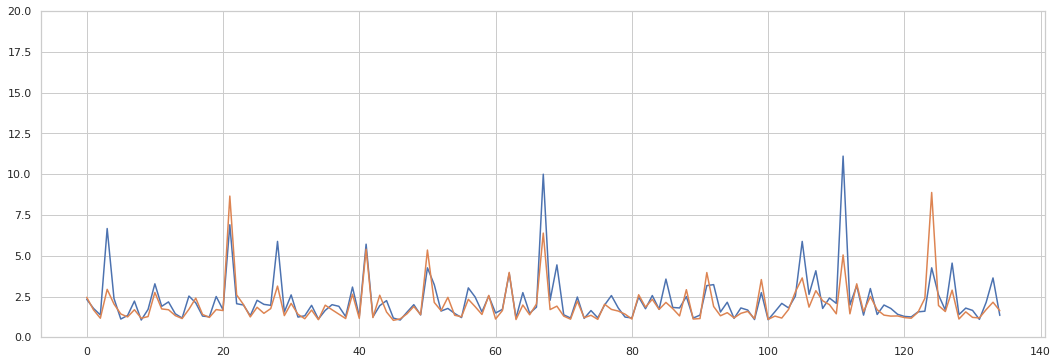

In [154]:
plt.figure (figsize=(18,6))
plt.plot(dde['cote_1_basée_proba'])
plt.plot(dde['1'])
plt.ylim([0,20]);

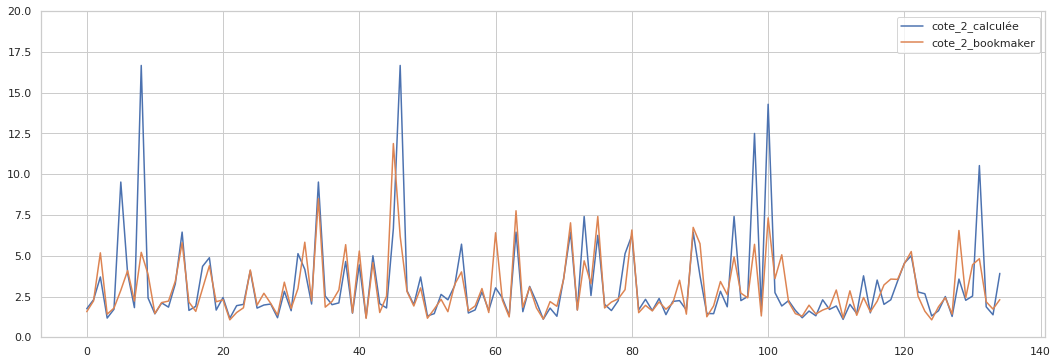

In [155]:
plt.figure (figsize=(18,6))
plt.plot(dde['cote_2_basée_proba'], label='cote_2_calculée')
plt.plot(dde['2'], label='cote_2_bookmaker')
plt.ylim([0,20])  # cette courbe montre qu'on doit avoir une invserion des cotes V1 et V2
plt.legend();

In [ ]:
# REPRISE DES EXPLOITATIONS DONNEES avec CatBoostClassifier

## Sorties PROBA CatBOOST

In [156]:
x_bis = catb.predict_proba((test_X), 
              ntree_start=0, 
              ntree_end=0, 
              thread_count=-1, 
              verbose=None)

In [157]:
dfffx=pd.DataFrame.from_dict(x_bis).rename(columns={0 : 'Prob_defaite_home', 1:'Prob_victoire_home' })

In [158]:
ddex=pd.concat([dfffx, test_X_Eval], axis=1)  #

In [159]:
ddex.head(5) #(-> structure)

,Prob_defaite_home,Prob_victoire_home,1,2
0,0.583077,0.416923,2.45,1.57
1,0.441806,0.558194,1.68,2.23
2,0.186213,0.813787,1.17,5.18
3,0.802784,0.197216,2.94,1.42
4,0.561486,0.438514,2.04,1.79


In [160]:
ddex['cote_1_basée_proba'] = np.round((1 / ddex['Prob_victoire_home']),2)

ddex['cote_2_basée_proba'] = np.round((1 / ddex['Prob_defaite_home']),2)

ddex['cote_1_naive_vict_home'] = 1 

ddex['cote_2_naive_vict_away'] = 0 

ddex.head(5) # basé modèle Catboost

,Prob_defaite_home,Prob_victoire_home,1,2,cote_1_basée_proba,cote_2_basée_proba,cote_1_naive_vict_home,cote_2_naive_vict_away
0,0.583077,0.416923,2.45,1.57,2.40,1.72,1,0
1,0.441806,0.558194,1.68,2.23,1.79,2.26,1,0
2,0.186213,0.813787,1.17,5.18,1.23,5.37,1,0
3,0.802784,0.197216,2.94,1.42,5.07,1.25,1,0
4,0.561486,0.438514,2.04,1.79,2.28,1.78,1,0


In [161]:
ddex.shape

(135, 8)

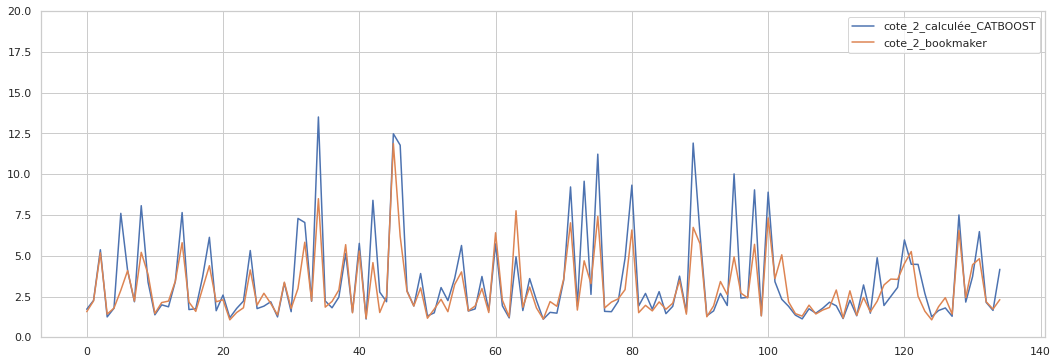

In [162]:
plt.figure (figsize=(18,6))
plt.plot(ddex['cote_2_basée_proba'], label='cote_2_calculée_CATBOOST')
plt.plot(ddex['2'], label='cote_2_bookmaker')
plt.ylim([0,20])  #
plt.legend();

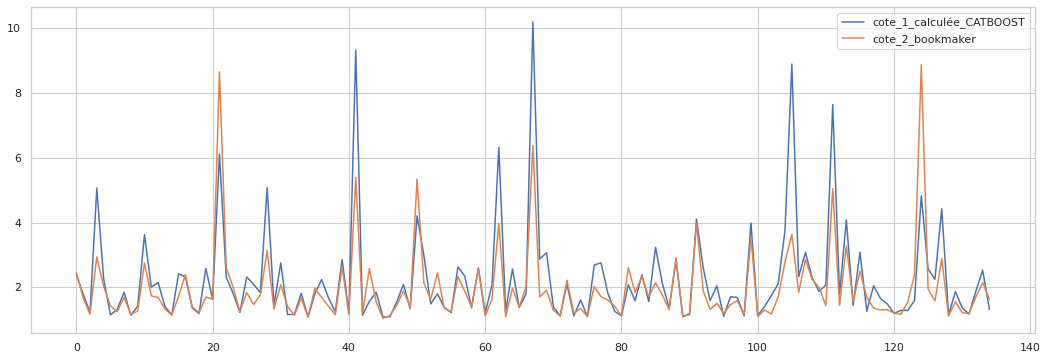

In [163]:
plt.figure (figsize=(18,6))
plt.plot(ddex['cote_1_basée_proba'], label='cote_1_calculée_CATBOOST')
plt.plot(ddex['1'], label='cote_2_bookmaker')
plt.legend();

In [164]:
# recherche de value_bet avec un coeef de sécurité 10% (intuitif)
vb1= ddex[ddex['1'] > ddex['cote_1_basée_proba']]
vb1.shape

(42, 8)

In [165]:
# recherche de value_bet
vb2= ddex[ddex['2']> ddex['cote_2_basée_proba']]
vb2.shape

(65, 8)

In [166]:
ddex.shape

(135, 8)

# suite -> new metrique

In [167]:
def bankroll(DATA):
  DATA["Bankroll"]=0.00
  if (DATA["HOME_TEAM_WINS_PRED"][0] == DATA["HOME_TEAM_WINS"][0]):
    DATA["Bankroll"][0]=10*float((DATA[str(DATA["HOME_TEAM_WINS"][0])][0]))-10
  else :
    DATA["Bankroll"][0]=-10.00
  for i in range(1,len(DATA)) :
    if (DATA["HOME_TEAM_WINS_PRED"][i] == DATA["HOME_TEAM_WINS"][i]):
      DATA["Bankroll"][i]=10*float((DATA[str(DATA["HOME_TEAM_WINS"][i])][i]))-10 + DATA["Bankroll"][i-1]
    else :
      DATA["Bankroll"][i]=DATA["Bankroll"][i-1]-10

def ROI(DATA):
  DATA["ROI"]=0.00
  for i in range(0,len(DATA)) :
      DATA["ROI"][i]=(DATA["Bankroll"][i]/((i+1)*10))*100

def ValueBet(DATA):
  DATA["ValueBet"]=0
  for i in range(0,len(DATA)) :
    if (DATA["Prob_victoire_home"][i]==max(DATA["Prob_victoire_home"][i],DATA["Prob_defaite_home"][i])):
      if ( ((DATA["Prob_victoire_home"][i]) - 1/(DATA["1"][i])) > 0 ) :
        DATA["ValueBet"][i]=1
      else:
        DATA["ValueBet"][i]=0
    else:
      if ( ((DATA["Prob_defaite_home"][i]) - 1/(DATA["2"][i])) > 0 ) :
        DATA["ValueBet"][i]=1
      else:
        DATA["ValueBet"][i]=0

def sucessRate(DATA):
  DATA["SucessRate"]=0.0
  for i in range(0,len(DATA)) :
    if(DATA["HOME_TEAM_WINS_PRED"][i] == DATA["HOME_TEAM_WINS"][i]):
      DATA["SucessRate"][i]=1
    else :
      DATA["SucessRate"][i]=0
      
def ACCU(DATA):
  DATA["Accuracy"]=0.0
  for i in range(0,len(DATA)) :
    if(len(DATA["SucessRate"][0:i+1].value_counts(normalize=True))>1):
      DATA["Accuracy"][i]=DATA["SucessRate"][0:i+1].value_counts(normalize=True)[1]

In [168]:
test_X

,GAME_ID,SEASON,STANDINGSDATE,G,W,L,HOME_W,HOME_L,AWAY_W,AWAY_L,G_VISITOR,W_VISITOR,L_VISITOR,HOME_W_VISITOR,HOME_L_VISITOR,AWAY_W_VISITOR,AWAY_L_VISITOR,SEASON_something,TOP_PLAYERS,SEASON_VISITOR,TOP_PLAYERS_VISITOR,EFF,EFF_VISITOR,HG_7days,AG_7days,G_7days,BACK2BACK,HG_7days_VISITOR,AG_7days_VISITOR,G_7days_VISITOR,BACK2BACK_VISITOR,HOME_ELO,VISITOR_ELO,ELO_DIFF,TOP_PLAYER_DIFF,EFF_DIFF,MONTH_x,1,2,Year
854,21900909,2019,62,60.0,21.0,39.0,9.0,19.0,12.0,20.0,59,25,34,15,14,10,20,2019,4,2019,6,589.800000,770.625000,2.0,2.0,4.0,0,3.0,0.0,3.0,1,1462.938413,1502.683030,-39.744617,-2,-180.825000,3,2.45,1.57,2020
602,21900633,2019,17,40.0,26.0,14.0,14.0,5.0,12.0,9.0,41,33,8,16,5,17,3,2019,7,2019,7,1038.888889,731.090909,2.0,1.0,3.0,0,2.0,1.0,3.0,0,1704.042422,1662.105355,41.937067,0,307.797980,1,1.68,2.23,2020
584,21900613,2019,14,40.0,33.0,7.0,16.0,4.0,17.0,3.0,40,19,21,13,8,6,13,2019,7,2019,6,731.090909,710.555556,1.0,2.0,3.0,0,1.0,2.0,3.0,0,1770.359120,1515.361233,254.997888,1,20.535354,1,1.17,5.18,2020
516,21900539,2019,5,38.0,15.0,23.0,7.0,11.0,8.0,12.0,36,22,14,15,4,7,10,2019,5,2019,7,550.142857,732.400000,1.0,2.0,3.0,0,2.0,1.0,3.0,0,1507.339561,1556.559124,-49.219563,-2,-182.257143,1,2.94,1.42,2020
306,21900308,2019,337,20.0,9.0,11.0,7.0,4.0,2.0,7.0,19,9,10,5,7,4,3,2019,8,2019,7,591.416667,760.111111,2.0,2.0,4.0,1,2.0,1.0,3.0,0,1620.626021,1399.475944,221.150077,1,-168.694444,12,2.04,1.79,2019
240,21900235,2019,327,16.0,11.0,5.0,6.0,1.0,5.0,4.0,15,10,5,6,3,4,2,2019,7,2019,9,860.000000,857.000000,1.0,2.0,3.0,0,3.0,0.0,3.0,0,1756.349296,1519.645912,236.703383,-2,3.000000,11,1.43,2.88,2019
343,21900350,2019,342,23.0,13.0,10.0,9.0,2.0,4.0,8.0,22,10,12,7,5,3,7,2019,8,2019,6,924.636364,892.142857,2.0,1.0,3.0,0,2.0,1.0,3.0,1,1657.987294,1539.748509,118.238786,2,32.493506,12,1.25,4.09,2019
3,21900407,2019,351,27.0,6.0,21.0,3.0,10.0,3.0,11.0,30,13,17,7,8,6,9,2019,6,2019,7,735.750000,594.888889,1.0,3.0,4.0,0,1.0,3.0,4.0,1,1407.444070,1425.105408,-17.661338,-1,140.861111,12,1.69,2.22,2019
510,21900523,2019,3,36.0,25.0,11.0,15.0,3.0,10.0,8.0,35,13,22,7,12,6,10,2019,8,2019,6,762.090909,544.777778,2.0,1.0,3.0,0,1.0,2.0,3.0,0,1742.015970,1410.102323,331.913647,2,217.313131,1,1.17,5.21,2020
427,21900441,2019,355,30.0,26.0,4.0,14.0,2.0,12.0,2.0,29,20,9,13,3,7,6,2019,10,2019,7,805.916667,674.727273,2.0,1.0,3.0,1,3.0,0.0,3.0,0,1833.009823,1595.665120,237.344703,3,131.189394,12,1.27,3.86,2019


In [169]:
## Recuperation des dates pour assurer la chronologie de la bankroll
Date_info=test_X[["GAME_ID","SEASON","STANDINGSDATE","1","2"]]
Date_info.head()
Rslt=pd.DataFrame(test_y)
#GAME_ID 	SEASON 	STANDINGSDATE 	1 	2 	HOME_TEAM_WINS
Date_rslt=pd.merge(Date_info, Rslt, left_index=True, right_index=True)
Date_rslt.head()
#DATAFRAME DE TRAVAIL#
BK=pd.merge(Date_rslt,ddex,left_on=["1","2"],right_on=["1","2"])
BK=BK.sort_values(by="STANDINGSDATE").reset_index(drop=True)
BK.head()
# Legère modification de la var HOME_TEAM_WINS au lieu de 0 pour defaite et 1 pour WIN , elle représente le résultat du match : 1 = Victoire a domicile, 2= victoire à l'extérieur 
# Plus simple pour coller au côtes
BK["HOME_TEAM_WINS_PRED"]=2
BK["HOME_TEAM_WINS_PRED"][BK["Prob_victoire_home"]>0.5]=1
BK["HOME_TEAM_WINS"][BK["HOME_TEAM_WINS"]==0]=2
BK=BK.drop_duplicates(subset="GAME_ID").reset_index(drop=True)

In [170]:
ValueBet(BK)
bankroll(BK)
ROI(BK)
sucessRate(BK)
ACCU(BK)


In [171]:
print("Accu =",BK["Accuracy"][len(BK)-1], "BK =",BK["Bankroll"][len(BK)-1], "ROI =",BK["ROI"][len(BK)-1])

Accu = 0.674074074074074 BK = 50.2 ROI = 3.718518518518519


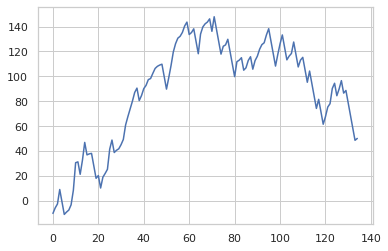

In [172]:
BK["Bankroll"].plot()

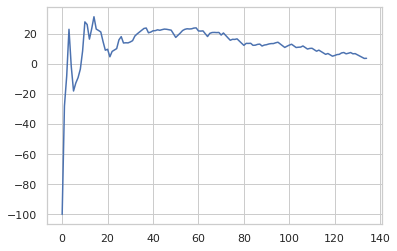

In [173]:
BK["ROI"].plot()

In [174]:
ValueBet(BK)
BK=BK[BK["ValueBet"]==1].reset_index(drop=True)
bankroll(BK)
ROI(BK)
sucessRate(BK)
ACCU(BK)


In [175]:
print("Accu =",BK["Accuracy"][len(BK)-1], "BK =",BK["Bankroll"][len(BK)-1], "ROI =",BK["ROI"][len(BK)-1])

Accu = 0.6666666666666666 BK = 99.59999999999997 ROI = 12.769230769230766


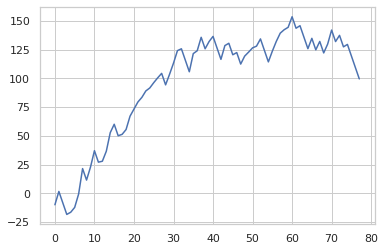

In [176]:
BK["Bankroll"].plot()

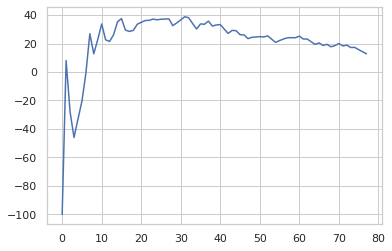

In [177]:
BK["ROI"].plot()

In [ ]:
# commentaire : 
# bankroll -> mise de 10 unités (euros ou autres)
# ROI = bankroll / somme des mises de 10 unites

# Un « Value Bet » (ou une « Value Bet ») est un pari où le parieur estime que la cote proposée par 
# le bookmaker est supérieure à la cote objective de la rencontre
# ou tout du moins à la cote que le parieur aurait donné pour la rencontre

# Une « Value Bet » correspond toujours à une cote que l'on considère comme erronée, et même comme fortement erronée
# Si on joue tout le temps des « Value Bet », même si on perd certains paris, on sera bénéficiaire au final car les cotes jouées seront supérieures à la moyenne de nos pertes

# DATA['V1'] ou DATA['V2'] ou DATA['N'] = cote du BOOKMAKER
# DATA["PredProbV1"] ou DATA["PredProbV2"] ou DATA["PredProbN"] = calcul de proba V1 ou V2 ou N issu du MODELE DE CALCUL

# ex:  si DATA["PredProbV1"] > 1 / DATA['V1'] -> on est dans le cas d'un valuebet et il faut parier V1